In [ ]:
import pandas as pd
import numpy as np

train_df=pd.read_csv('train.csv')
job_tags_df=pd.read_csv('job_tags.csv')
user_tags_df=pd.read_csv('user_tags.csv')
tags_df=pd.read_csv('tags.csv')
job_companies_df=pd.read_csv('job_companies.csv')
test_df=pd.read_csv('test_job.csv')

## tags_df
unique_tag_list=tags_df['tagID'].tolist()
# print(len(unique_tag_list))
## job_tags_df
job_list=job_tags_df['jobID'].tolist()
tag_list=job_tags_df['tagID'].tolist()

tags_by_job={}

for i in range(len(tag_list)):
    if not job_list[i] in tags_by_job.keys():
        tags_by_job[job_list[i]]=[]
    tags_by_job[job_list[i]].append(unique_tag_list.index(tag_list[i]))

## job_companies_df
job_list=job_companies_df['jobID'].tolist()
company_list=job_companies_df['companyID'].tolist()
company_set_list=list(set(company_list))
# print(len(company_set_list))
size_list=job_companies_df['companySize'].tolist()
size_set_list=list(set(size_list))
# print(len(size_set_list))
company_and_size_by_job={}

for i in range(len(job_list)):
    company_and_size_by_job[job_list[i]]=[company_set_list.index(company_list[i]), size_set_list.index(size_list[i])]

## user_tags_df
user_list=user_tags_df['userID'].tolist()
tag_list=user_tags_df['tagID'].tolist()

tags_by_user={}

for i in range(len(user_list)):
    if not user_list[i] in tags_by_user.keys():
        tags_by_user[user_list[i]]=[]
    tags_by_user[user_list[i]].append(unique_tag_list.index(tag_list[i]))

## train_df

train_user=train_df['userID'].tolist()
train_job=train_df['jobID'].tolist()
train_y=train_df['applied'].tolist()

train_data=[]
for i in range(len(train_user)):
    user_tags=tags_by_user[train_user[i]]
    job_tags=tags_by_job[train_job[i]]
    job_comp=company_and_size_by_job[train_job[i]]
    # print(job_comp)
    train_data.append([[1 if i in set(user_tags) else 0 for i in range(887)] + [1 if i in job_tags else 0 for i in range(887)] + [job_comp[0]/275, job_comp[1]/7]])
    # train_data.append([list(set(user_tags)), job_tags, job_comp])

train_data=np.asarray(train_data)
train_y=np.asarray(train_y)

## test_df

test_user=test_df['userID'].tolist()
test_job=test_df['jobID'].tolist()

test_data=[]
for i in range(len(test_user)):
  user_tags=tags_by_user[test_user[i]]
  job_tags=tags_by_job[test_job[i]]
  job_comp=company_and_size_by_job[test_job[i]]
  # print(job_comp)
  test_data.append([[1 if i in set(user_tags) else 0 for i in range(887)] + [1 if i in job_tags else 0 for i in range(887)] + [job_comp[0]/275, job_comp[1]/7]])

test_data=np.asarray(test_data)


In [ ]:
print(train_data.shape)
print(train_y.shape)
print(test_data.shape)

(6000, 1, 1776)
(6000,)
(2435, 1, 1776)


In [ ]:
from keras import models, layers

network=models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(1776,)))
# network.add(layers.Dropout(0.5))
network.add(layers.Dense(32, activation='relu'))
# network.add(layers.Dropout(0.5))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_data=train_data.reshape((6000, 1776))
test_data=test_data.reshape((2435, 1776))

In [ ]:
part_train_data=train_data[:5500]
val_data=train_data[5500:]

part_train_y=train_y[:5500]
val_y=train_y[5500:]

In [ ]:
history=network.fit(train_data, train_y, epochs=200, batch_size=128)

Epoch 1/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.8493
Epoch 2/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8572
Epoch 3/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8572
Epoch 4/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.8572
Epoch 5/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8585
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8650
Epoch 7/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8680
Epoch 8/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8725
Epoch 9/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8763
Epoch 10/200
47/47 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.8793
Epoch 11/

In [ ]:
history=network.fit(part_train_data, part_train_y, epochs=500, batch_size=256, validation_data=(val_data, val_y))

In [ ]:
# history=network.fit(part_train_data, part_train_y, epochs=50, batch_size=512,
#                     validation_data=(val_data, val_y))

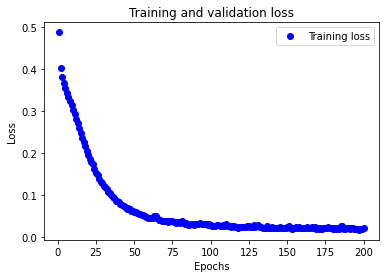

In [ ]:
import matplotlib.pyplot as plt
history_dict=history.history
loss=history_dict['loss']
# val_loss=history_dict['val_loss']

epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
output=network.predict(test_data)
output=np.where(output>0.5, 1, 0)
output=output.reshape(2435, 1)
np.savetxt("foo5.csv", output, fmt='%i', delimiter=",")